SQLite database 'sales_data.db' created and populated with sample data (if not already exists).
Connected to sales_data.db

Product Sales Summary:
| product   | total_quantity_sold   | total_revenue   |
|:----------|:----------------------|:----------------|
| Laptop    | 126                   | 151200          |
| Mouse     | 630                   | 15750           |
| Keyboard  | 210                   | 15750           |
| Monitor   | 35                    | 10500           |


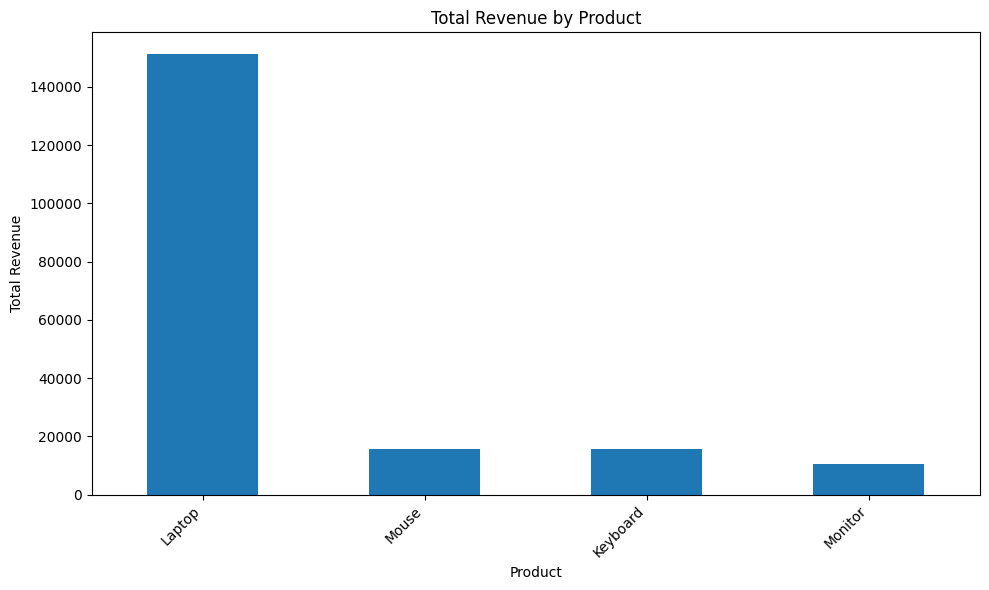


Database connection closed.


In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Create and Populate Database (Run this part ONLY ONCE) ---
conn_init = sqlite3.connect('sales_data.db')
cursor_init = conn_init.cursor()
cursor_init.execute('''
      CREATE TABLE IF NOT EXISTS sales (
         product TEXT,
         quantity INTEGER,
         price REAL
    )
 ''')
sample_data = [
     ('Laptop', 10, 1200.00),
     ('Mouse', 50, 25.00),
     ('Keyboard', 30, 75.00),
     ('Monitor', 5, 300.00),
     ('Laptop', 8, 1200.00),
     ('Mouse', 40, 25.00)
 ]
cursor_init.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn_init.commit()
conn_init.close()
print("SQLite database 'sales_data.db' created and populated with sample data (if not already exists).")
 # --- End of Step 1 (Comment out or delete after first run) ---

# --- Step 2: Connect to the Database ---
conn = sqlite3.connect('sales_data.db')
print("Connected to sales_data.db")

# --- Step 3 & 4: Run SQL Query, Load into Pandas, and Display Results ---
query_product_summary = """
    SELECT
        product,
        SUM(quantity) AS total_quantity_sold,
        SUM(quantity * price) AS total_revenue
    FROM
        sales
    GROUP BY
        product
    ORDER BY
        total_revenue DESC;
"""
df_product_summary = pd.read_sql_query(query_product_summary, conn)
print("\nProduct Sales Summary:")
print(df_product_summary.to_markdown(index=False, numalign="left", stralign="left"))

# --- Step 5: Create a Basic Bar Chart ---
plt.figure(figsize=(10, 6))
df_product_summary.plot(kind='bar', x='product', y='total_revenue', legend=False, ax=plt.gca()) # Use ax=plt.gca() for explicit axes
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# --- Step 6: Close the Database Connection ---
conn.close()
print("\nDatabase connection closed.")

